To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/pearl-yu/foster_2022fall/blob/2022-master/Homeworks/HW%202.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>

In [46]:
#If opening in colab run this cell
!git clone https://github.com/pearl-yu/foster_2022fall
%cd foster_2022fall/Homeworks/

Cloning into 'foster_2022fall'...
remote: Enumerating objects: 1302, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 1302 (delta 116), reused 153 (delta 88), pack-reused 1066
Receiving objects: 100% (1302/1302), 66.30 MiB | 20.08 MiB/s, done.
Resolving deltas: 100% (756/756), done.
Checking out files: 100% (88/88), done.
/content/foster_2022fall/Homeworks/foster_2022fall/Homeworks/foster_2022fall/Homeworks/foster_2022fall/Homeworks


# Part II: Predicting Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. Ideally, you should be able to start working on your term project after finishing this.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [47]:
import pandas as pd

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv" 

### Loading the data

** 1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset. ** 

In [48]:
# Put your answer here
df = pd.read_csv(data_path)
# Print the total number of rows
print(len(df))
# Take a look at the data
df.head(10)

110527


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age = How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

** 2. Check out if there are any Na or NaN values. Drop all the observations that include such values in any of the columns. ** 

In [49]:
# Put your answer here
# Using isna to select all rows with NaN under an entire DataFrame
df[df.isna().any(axis=1)]
# Drop if there's any (it seems the dataset doesn't have any Na or NaN values)
df.dropna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Dealing with dates

** 3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). **

In [50]:
# Put your answer here
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')
# Take a look at the data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


** 4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, "normalize" ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method. **

In [51]:
# Put your answer here
# Convert datetime column to just date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.normalize()
# Take a look at the data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No


** 5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [52]:
# Put your answer here
df['TimeInAdvance'] = (df['AppointmentDay'] - df['ScheduledDay'])
# Turn timeDelta to integers
df['TimeInAdvance'] = df['TimeInAdvance'].dt.days.astype('int16')
# Take a look at the column
df['TimeInAdvance']

0          0
1          0
2          0
3          0
4          0
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Name: TimeInAdvance, Length: 110527, dtype: int16

There are many other features you may want to extract from date variables, such as the time at which the appointment was schedule, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data (in case you forgot about it, take a look at the 'Dealing with data' notebook in Module 1). Do you see any weird values in any of the columns? Remove all observations that include "weird" or otherwise questionable values and comment on why did you remove such observations. Also, print the number of observations you removed. **

In [53]:
# Put your answer here
# General stats about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [54]:
# Put your answer here
# Remove Age < 0 and TimeInAdvance < 0
df = df.loc[~(df['Age'] < 0)]
df = df.loc[~(df['TimeInAdvance'] < 0)]
print('Reasons for removing:')
print('(1) Age must be greater than 0;')
print('(2) Since the AppointmentDay must be later than the ScheduleDay, TimeInAdvance must be a value greater than 0.')
# Print the number of observations I removed
print('The number of observations I removed:')
print(110527-(len(df)))

Reasons for removing:
(1) Age must be greater than 0;
(2) Since the AppointmentDay must be later than the ScheduleDay, TimeInAdvance must be a value greater than 0.
The number of observations I removed:
6


### Dealing with binary variables

** 7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.  **

In [55]:
# Put your answer here
# Create a new column
df["IsFemale"] = (df.Gender == "F").astype(int)
df = df.drop(columns=['Gender'])
df.head(8)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1
5,9.598510e+13,5626772,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2,1
6,7.336880e+14,5630279,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,1
7,3.449830e+12,5630575,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,1


** 8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise. **

In [56]:
# Put your answer here
df['No-show'] = df['No-show'].str.replace('No','1')
df['No-show'] = df['No-show'].str.replace('Yes','0')
df.head(8)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,1
1,5.589980e+14,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0
2,4.262960e+12,5642549,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,1
3,8.679510e+11,5642828,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,1
4,8.841190e+12,5642494,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,1
5,9.598510e+13,5626772,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,2,1
6,7.336880e+14,5630279,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,2,1
7,3.449830e+12,5630575,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,2,1


### Dealing with categorical variables

** 9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?  ** 

In [57]:
# Put your answer here
# How many unique neighborhoods are there
df['Neighborhood'].nunique()
print("How many unique neighborhoods are there:", df['Neighborhood'].nunique())
print("\n")
# 5 most common neighborhoods
most = df['Neighborhood'].value_counts().nlargest(5)
print("5 most common neighborhoods:\n", most)
print("\n")
# 5 least common neighborhoods
least = df['Neighborhood'].value_counts().nsmallest(5)
print("5 least common neighborhoods:\n", least)

How many unique neighborhoods are there: 81


5 most common neighborhoods:
 JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4430
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighborhood, dtype: int64


5 least common neighborhoods:
 PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
Name: Neighborhood, dtype: int64


** 10. (Optional) We often group together categories that are very rare because it's hard to genearlize from them. Find the neighborhoods that appear less than 500 times in the dataset and replace their name with "OTHER". **

In [58]:
# Put your (optional) answer here
noise = df[df['Neighborhood'].map(df['Neighborhood'].value_counts()) < 500]
df.loc[df.Neighborhood.isin(noise['Neighborhood']), 'Neighborhood'] = "OTHER"
df.head(5)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,1
1,5.589980e+14,5642503,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,0
2,4.262960e+12,5642549,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,1
3,8.679510e+11,5642828,2016-04-29,2016-04-29,8,OTHER,0,0,0,0,0,0,1,0,1
4,8.841190e+12,5642494,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,1


** 11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Make sure to also drop the Neighborhood column. **

In [64]:
# Put your answer here
# Get dummy variables for each neighborhood
df = pd.get_dummies(df, columns=['Neighborhood'])
df.head(8)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SANTOS DUMONT,Neighborhood_SANTOS REIS,Neighborhood_SÃO BENEDITO,Neighborhood_SÃO CRISTÓVÃO,Neighborhood_SÃO JOSÉ,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,Neighborhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29,2016-04-29,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29,2016-04-29,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29,2016-04-29,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29,2016-04-29,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29,2016-04-29,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.598510e+13,5626772,2016-04-27,2016-04-29,76,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7.336880e+14,5630279,2016-04-27,2016-04-29,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.449830e+12,5630575,2016-04-27,2016-04-29,39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with panel data

** 12. Let's take a look at the PatientId column. How many patients have made more than one appointment?  **

In [65]:
# Put your answer here
df.groupby('PatientId').filter(lambda x: len(x) > 1)['PatientId']

0         2.987250e+13
1         5.589980e+14
2         4.262960e+12
3         8.679510e+11
5         9.598510e+13
              ...     
110521    3.635530e+13
110522    2.572130e+12
110523    3.596270e+12
110525    9.213490e+13
110526    3.775120e+14
Name: PatientId, Length: 73272, dtype: float64

As you can see, there are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. That being said, taking advantage of panel data often requires additional data processing. The following exercise is **optional** and relatively advanced, so feel free to ignore it. 

** 13. (Optional) Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All of these things can be done using pandas. **

In [66]:
# Put your (optional) answer here
df['PreviousNoShows'] = df.groupby('PatientId')['No-show'].transform(lambda x: len(x))
# Sort previousNoShows
df.sort_values(by=['PreviousNoShows'], ascending=False)
df.head(8)

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SANTOS DUMONT,Neighborhood_SANTOS REIS,Neighborhood_SÃO BENEDITO,Neighborhood_SÃO CRISTÓVÃO,Neighborhood_SÃO JOSÉ,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,Neighborhood_VILA RUBIM
0,2.987250e+13,5642903,2016-04-29,2016-04-29,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29,2016-04-29,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29,2016-04-29,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29,2016-04-29,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29,2016-04-29,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.598510e+13,5626772,2016-04-27,2016-04-29,76,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7.336880e+14,5630279,2016-04-27,2016-04-29,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.449830e+12,5630575,2016-04-27,2016-04-29,39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay. **

In [67]:
# Put your answer here
df = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])
df.head(8)

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale,...,Neighborhood_SANTO ANDRÉ,Neighborhood_SANTO ANTÔNIO,Neighborhood_SANTOS DUMONT,Neighborhood_SANTOS REIS,Neighborhood_SÃO BENEDITO,Neighborhood_SÃO CRISTÓVÃO,Neighborhood_SÃO JOSÉ,Neighborhood_SÃO PEDRO,Neighborhood_TABUAZEIRO,Neighborhood_VILA RUBIM
0,62,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,56,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,56,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,76,0,1,0,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
6,23,0,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
7,39,0,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


### Predictive modeling

** 15. Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds. **

In [69]:
# Put your answer here
# Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds.
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Put your answer here
# Split the data into training and testing sets and drop nan values
X = df.drop(columns=['No-show'])
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.dropna()
y_train = y_train.dropna()

# If x has previous no show more than 10 then replace it with 10
# X_train['PreviousNoShows'] = X_train['PreviousNoShows'].mask(X_train['PreviousNoShows'] > 10, 10)
# X_test['PreviousNoShows'] = X_test['PreviousNoShows'].mask(X_test['PreviousNoShows'] > 10, 10)

# Fit the model and cross validate
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Training accuracy:", clf.score(X_train, y_train))
print("Cross-validated accuracy:", scores.mean())

Training accuracy: 0.9788612920738328
Cross-validated accuracy: 0.7311345974968477


** 16. As discussed in class, one way to control the complexity of a decision tree is by enforcing that at least some minimum number of examples from the training set populate each leaf. This is set with the min_samples_leaf parameter. Try values for min_samples_leaf ranging from 1 to 4096 by doubling the number of samples (i.e., 1, 2, 4, 8, ..., 4096). For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot fitting curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this problem? ** 

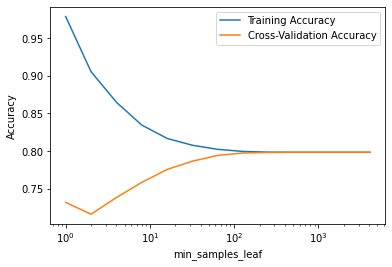

In [70]:
# Put your answer here
# Plot training accuracy and cross validation accuracy for different min_samples_leaf 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

min_samples_leaf = np.logspace(0,12, 13, base= 2)
train_accuracy = []
cv_accuracy = []
for i in min_samples_leaf:
    clf = DecisionTreeClassifier(min_samples_leaf = int(i))
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_accuracy.append(scores.mean())

plt.plot(min_samples_leaf, train_accuracy, label = 'Training Accuracy')
plt.plot(min_samples_leaf, cv_accuracy, label = 'Cross-Validation Accuracy')
plt.legend()
# x-axis is log scale
plt.xscale('log')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()


** 17. (Optional) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model? **

In [ ]:
# Put your (optional) answer here (use 'markdown' rather than 'code').

The model is not good since the features are correlated. For example, diabetes and hadicap are positively correlated. We should further analyze the data before fitting the model. For example, we can do PCA first so that we can reduce the correlation among features as much as possible.